# K Nearest Neighbors Project

## Import Libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
%matplotlib inline
sns.set_style('whitegrid')

<hr>

## Get the Data

**Read the 'KNN_Project_Data' csv file into a dataframe**

In [31]:
df = pd.read_csv('files/KNN_Project_Data')

In [32]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

<hr>

## Exploratory Data Analysis (EDA)

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

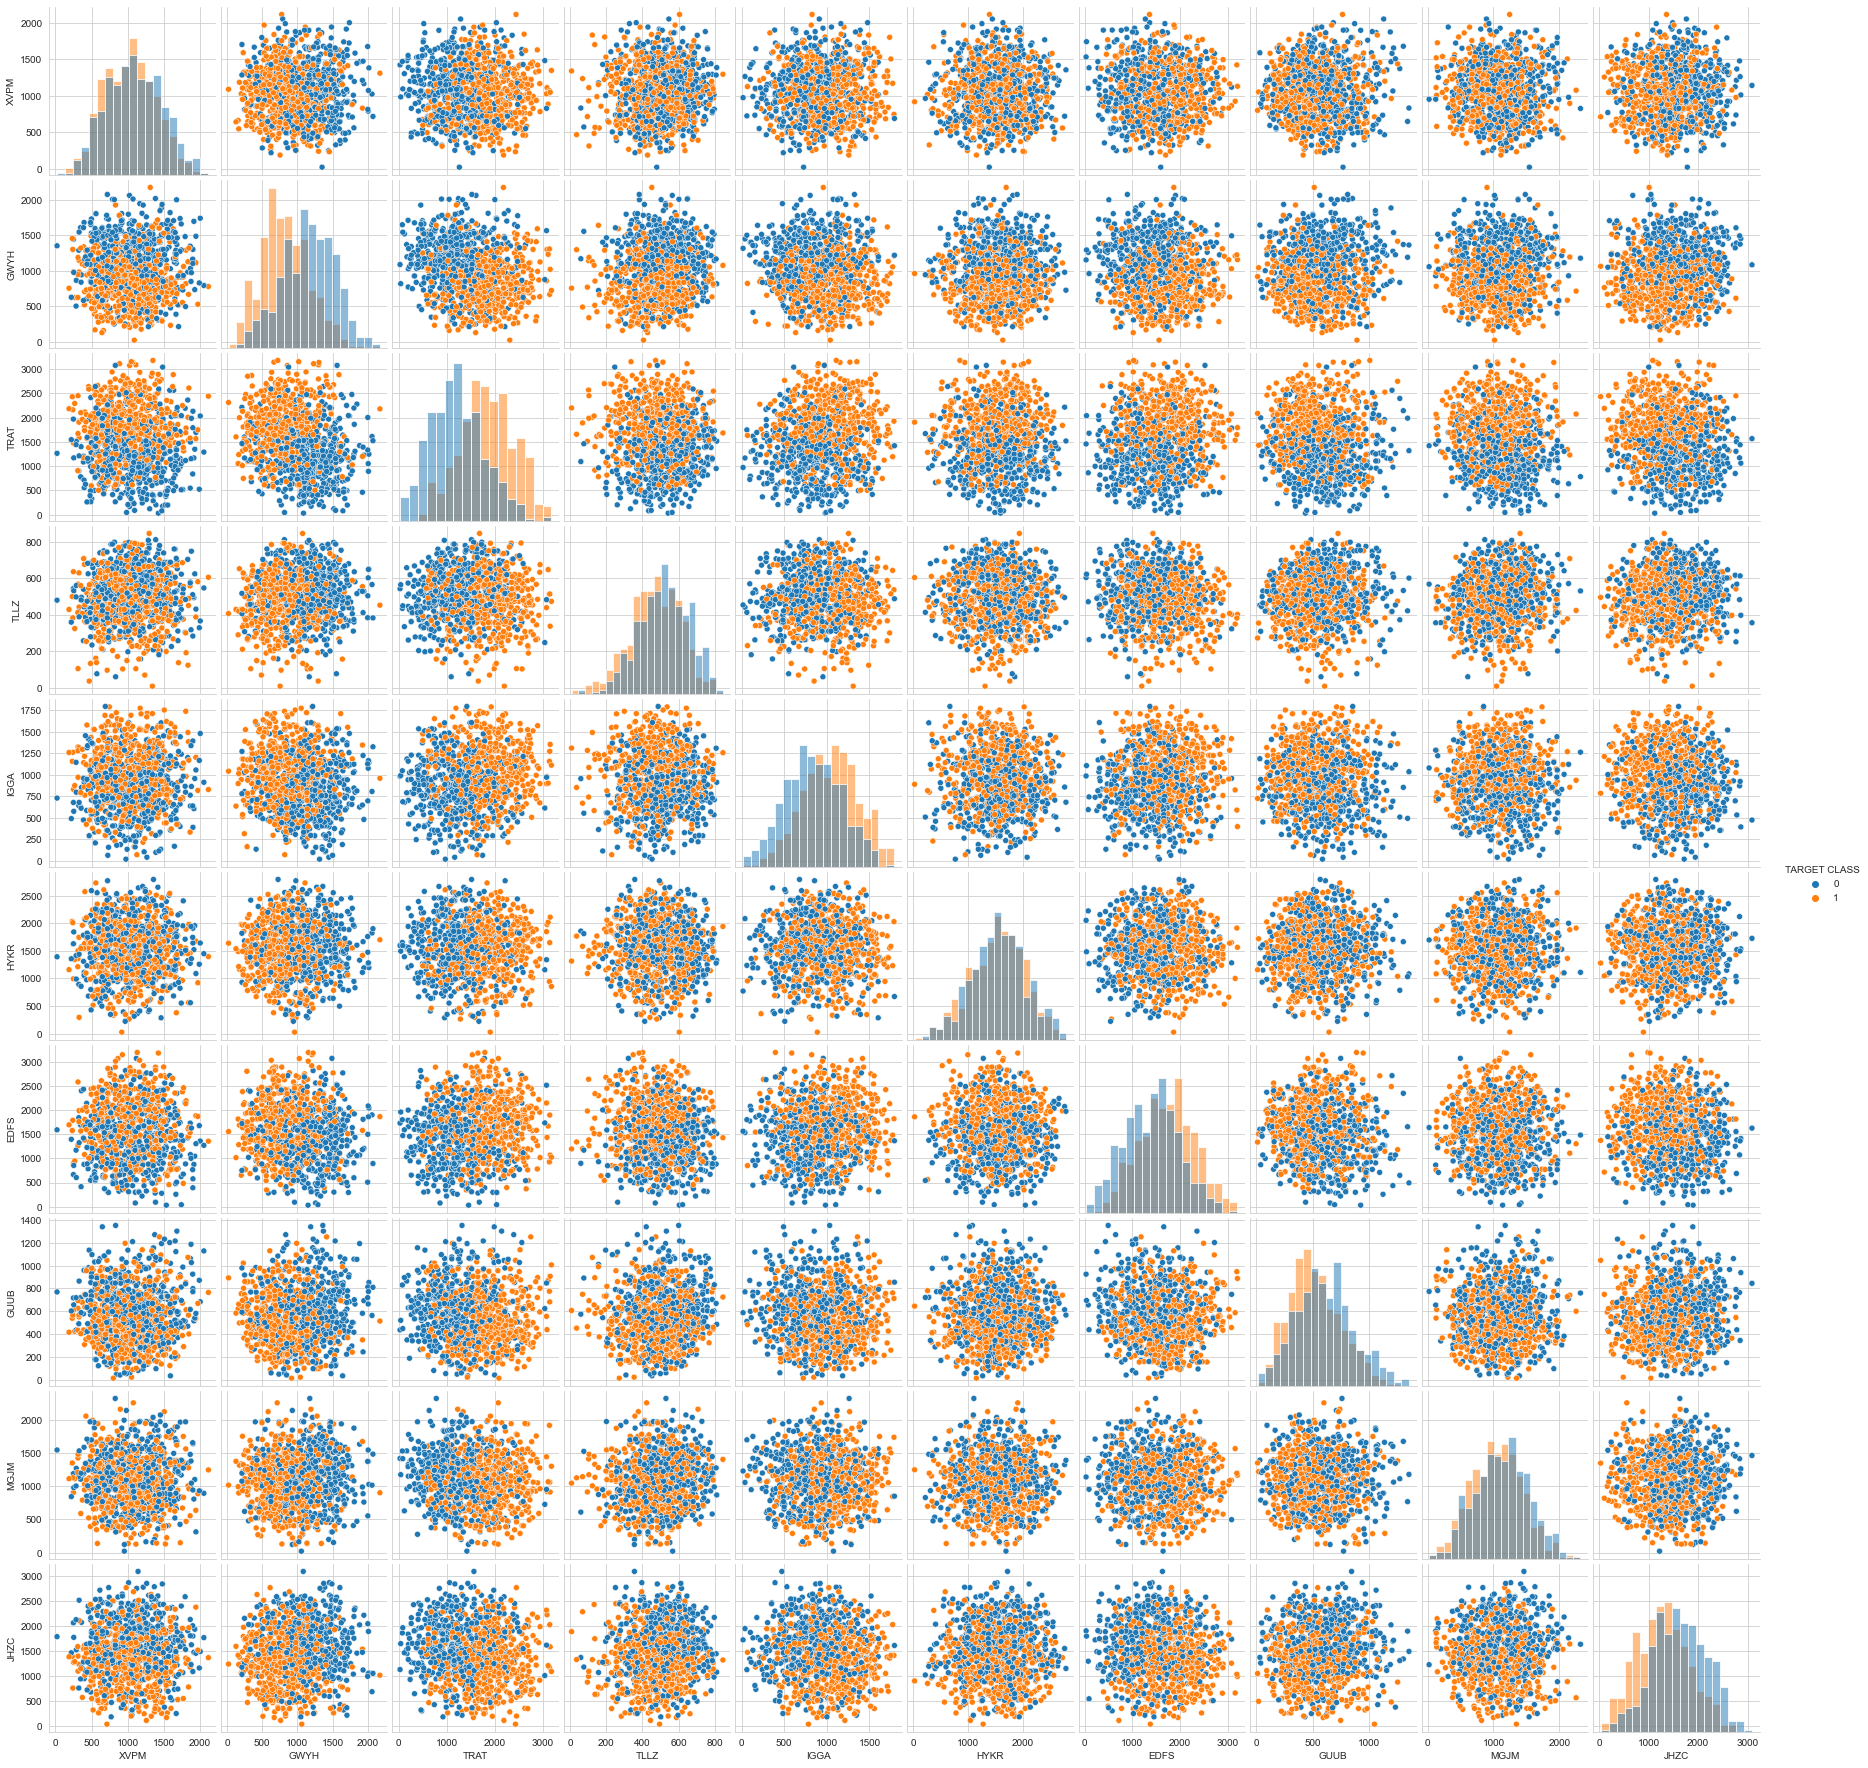

In [33]:
sns.pairplot(data=df, hue='TARGET CLASS', diag_kind='hist')

<hr>

## Standardize the Variables

**Import StandardScaler from Scikit learn.**

In [34]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [35]:
scaler = StandardScaler()

**Fit scaler to the features**

In [36]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [37]:
scaled_values = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [38]:
scaled_df = pd.DataFrame(scaled_values, columns=df.columns[:-1])
scaled_df.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

<hr>

## Train Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df['TARGET CLASS'], test_size=0.3)

In [41]:
X_train.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
754 -1.114727 -0.795679  0.658137 -1.978686 -1.406783 -0.731819  0.714618   
835 -0.362371  1.739171 -0.433437  1.000318 -0.610197  0.352229  1.120538   
743  1.286481 -0.925853  0.899374  1.102910  0.580848 -0.771245  0.961096   
379 -0.614324  1.427408  0.052259  1.153134 -1.276321  1.197192  0.232594   
29   1.277275  0.099093 -1.799487 -0.239736 -0.930359  0.532295 -0.636310   

         GUUB      MGJM      JHZC  
754 -0.473988 -0.478670  1.090500  
835  2.009534 -0.883121  0.798387  
743 -0.267042 -0.937186 -0.799142  
379  1.396965 -0.983105  0.358389  
29  -0.684067 -0.746201 -0.592457

In [42]:
y_train.head()

754    1
835    0
743    1
379    0
29     0
Name: TARGET CLASS, dtype: int64

<hr>

## Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [43]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [44]:
knn = KNeighborsClassifier(n_neighbors=1)

In [45]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

<hr>

## Predictions and Evaluations

**Use the predict method to predict values using your KNN model and X_test.**

In [46]:
predicted_values = knn.predict(X_test)

**Create a confusion matrix and classification report.**

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(confusion_matrix(y_test, predicted_values))

[[106  36]
 [ 40 118]]


In [49]:
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       142
           1       0.77      0.75      0.76       158

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



<hr>

## Choosing a K Value

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [51]:
error_rate = []

for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(y_test != pred))

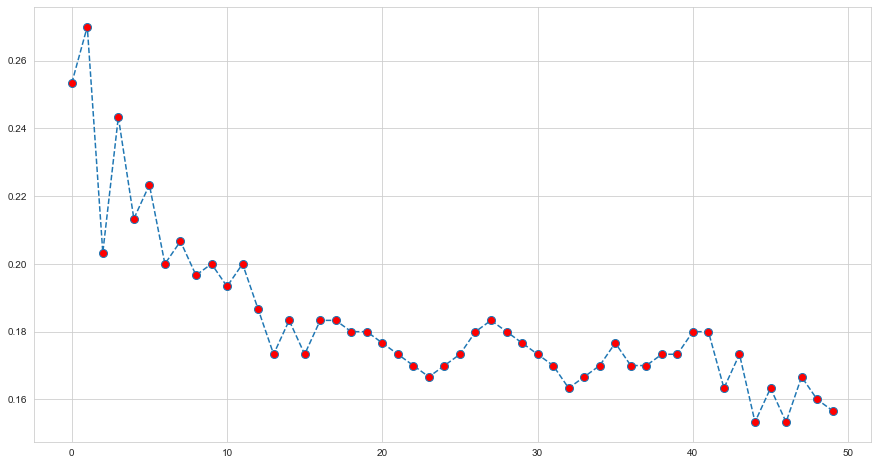

In [64]:
plt.figure(figsize=(15,8))
plt.plot(error_rate, marker='o', markerfacecolor='red', ls='dashed', markersize=8)

### Retrain with new K Value

**Retrain your model with the best K value and re-do the classification report and the confusion matrix.**

**K value = 43**

In [66]:
knn = KNeighborsClassifier(n_neighbors=43)
knn.fit(X_train, y_train)
predicted_values = knn.predict(X_test)

In [67]:
print(confusion_matrix(y_test, predicted_values))

[[115  27]
 [ 22 136]]


In [69]:
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       142
           1       0.83      0.86      0.85       158

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



<hr>